# Probando libreria Pandas de Python

## Introducción

Tener en cuenta que para este notebook los datos se encuentran dentro este mismo directorio dentro de la carpeta /data que no se incluye en el repositorio porque es muy pesada y no vale la pena alojar estos archivos. <b>Copiar el train.csv y test.csv dentro de la carpeta data</b><br>
Se intentará hacer un mini análisis de los datos para ver que es lo que tenemos a partir de la librería Pandas de Python. <br>
Esta librería la encontré en Kaggle.

## Desarrollo

In [33]:
import pandas as pd

Que tenemos?

In [79]:
train_df = pd.read_csv("data/train.csv", sep=',',encoding='latin1', parse_dates=['Time'], dayfirst=True, index_col='Id')
train_df[:5]

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Prediction,Time,Summary,Text
Id,,,,,,,,,
492346,B001VNP0Y6,AEZRVY3CV52UZ,"Corey Wright ""Democratus""",3,3,5,1320537600,Just what I needed,I got them in a very timely manner and they're...
343811,B008J1HO4C,A18VZYSLOUO060,"D. Simpson ""Frugal SOB""",2,2,5,1204329600,Most excellent oatmeal,McCann's Steel Cut Oatmeal is the perfect brea...
347257,B000FFIL60,A28Y1M7GRG0I9M,"Real Comments ""Lin""",0,0,4,1318464000,Quality Tea,I would recommend it. Quality pearls and a few...
225529,B002ZX1U9A,A245HC4T5J97WG,Logan DeAngelis,0,0,5,1306540800,Great Coffee at a Great price,"I have to admit, I first purchased these Hazel..."
485488,B001RVFERK,AVABPJCKE2MR5,spal,0,0,4,1314921600,Popchips Jalapeno flavor,I bought a case of jalapeno chips as I love th...


In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454760 entries, 492346 to 306406
Data columns (total 9 columns):
ProductId                 454760 non-null object
UserId                    454760 non-null object
ProfileName               454744 non-null object
HelpfulnessNumerator      454760 non-null int64
HelpfulnessDenominator    454760 non-null int64
Prediction                454760 non-null int64
Time                      454760 non-null object
Summary                   454739 non-null object
Text                      454760 non-null object
dtypes: int64(3), object(6)
memory usage: 34.7+ MB


Vemos algunas estadisticas de las columnas numericas.<br>
<li>Notar que tenemos 454.760 filas/observaciones</li>
<li>También notar que tanto HelpfunessNumerator como HelpfulnessNumerator tienen valores (ver max) que superan excesivamente la media y la desviación standard no es grande. <b>HABRÍA QUE VER QUÉ HACEMOS CON ESTOS DATOS EN CASO DE INCLUIRLOS EN EL ANÁLISIS (duperar, eliminar anomalias, suponer criterio de eliminación)</b></li>

In [35]:
train_df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Prediction
count,454760.000000,454760.000000,454760.000000
mean,1.757674,2.243447,4.182993
std,7.903720,8.546431,1.310285
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,1.000000,5.000000
75%,2.000000,2.000000,5.000000
max,866.000000,923.000000,5.000000


Buscamos cuantas filas de las columnas mencionadas superan cierto umbral

In [58]:
train_df[train_df['HelpfulnessNumerator'] > 100].count()

ProductId                 312
UserId                    312
ProfileName               312
HelpfulnessNumerator      312
HelpfulnessDenominator    312
Prediction                312
Time                      312
Summary                   312
Text                      312
dtype: int64

In [59]:
train_df[train_df['HelpfulnessDenominator'] > 100].count()

ProductId                 357
UserId                    357
ProfileName               357
HelpfulnessNumerator      357
HelpfulnessDenominator    357
Prediction                357
Time                      357
Summary                   357
Text                      357
dtype: int64

Pensé que iban a ser más <br><br>
Imprimimos la cantidad de valores nulos de cada columna

In [37]:
data_df.isnull().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Prediction                 0
Time                       0
Summary                   21
Text                       0
dtype: int64

Hacemos un grafico

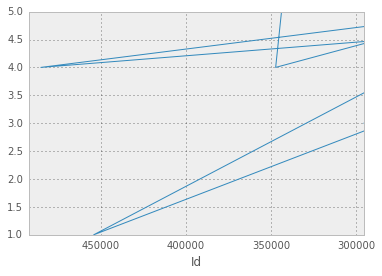

In [70]:
data_df['Prediction'][:10].plot()

Parece ser que hay Ids repetidos. ¿Esto será asi?<br>
Es probable que este graficando al revés. Pruebo indexando las predicciones.

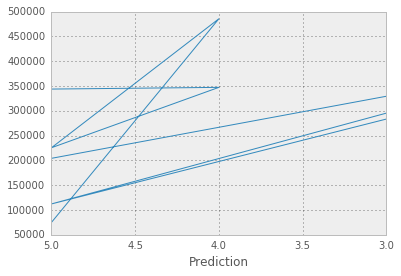

In [81]:
train_df = pd.read_csv("data/train.csv", sep=',',encoding='latin1', parse_dates=['Time'], dayfirst=True, index_col='Prediction')
train_df['Id'][:10].plot()

Estoy haciendo algo mal. Vuelvo al df anterior.

In [ ]:
train_df = pd.read_csv("data/train.csv", sep=',',encoding='latin1', parse_dates=['Time'], dayfirst=True, index_col='Id')
train_df[:5]